# SENCE 2021 Examples

Many examples are copied from https://www.python-graph-gallery.com/

## Sankey (with plotly)

### basic example

In [1]:
import plotly.graph_objects as go

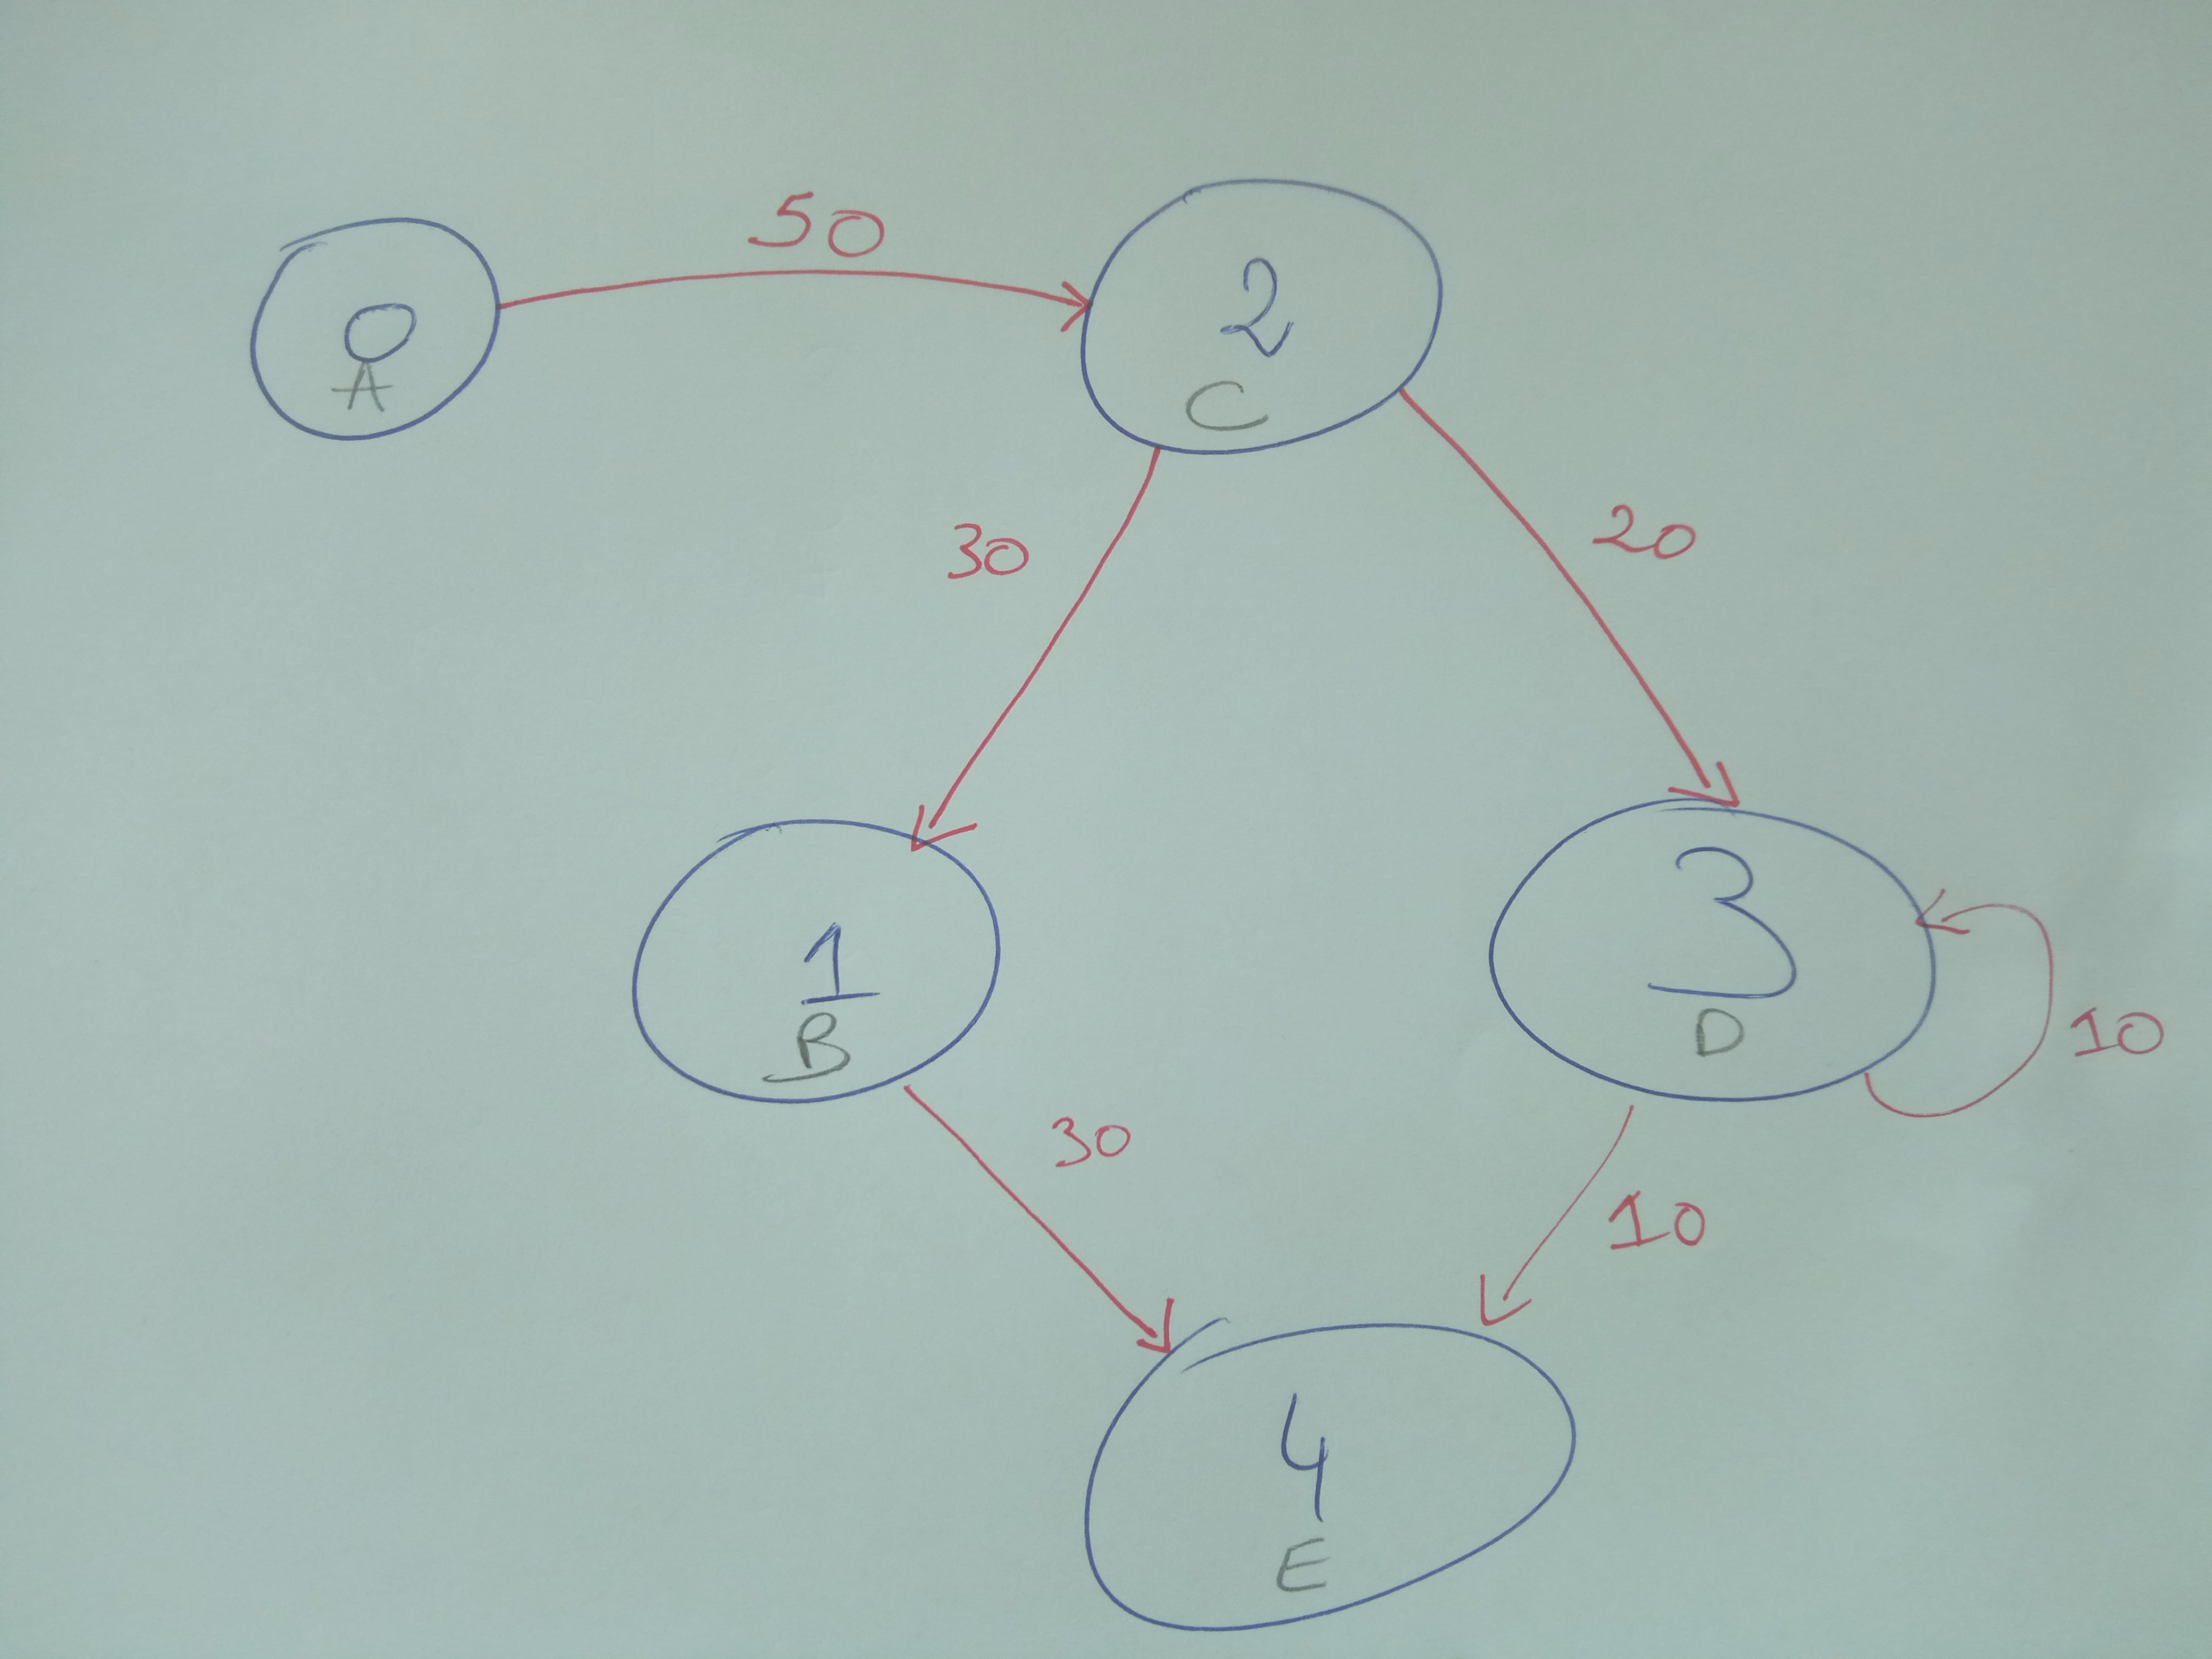

In [2]:
from IPython.display import Image
Image(filename='images/graph2.jpg')
# Graph with nodes, flows, and weights:

In [3]:
source = [0,   2,  2,  1,  3,  3]
target = [2,   1,  3,  4,  4,  3]
value =  [50, 30, 20, 30, 10, 10]

In [4]:
link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link, node = dict(label= ["A", "B", "C", "D", "E"]))

fig = go.Figure(data)

fig.write_html("simple-sankey.html")
# Alternative : fig.show()

In [5]:
%%html
<iframe src="simple-sankey.html" width="800" height="600"
 title="Sankey with plotly" style="border:none"></iframe>

### More complex example

In [6]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.write_html("sankey-plotly-python.html")
# Alternative : fig.show()

In [7]:
%%html
<iframe src="sankey-plotly-python.html" width="800" height="600"
 title="Sankey with plotly" style="border:none"></iframe>

## Contour plots

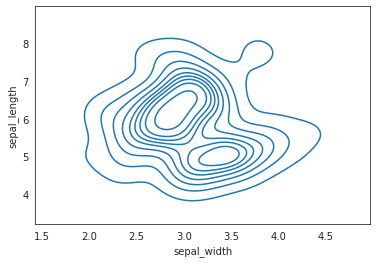

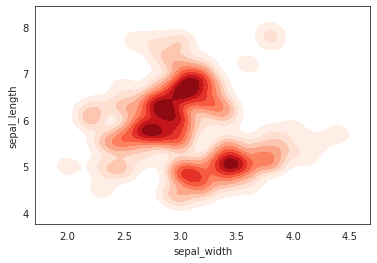

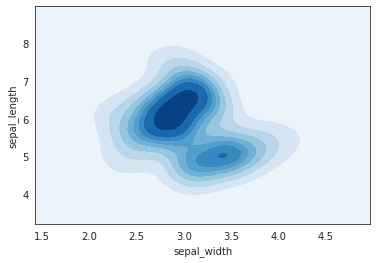

In [8]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df.sepal_width, y=df.sepal_length)
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Blues", shade=True, thresh=0)
plt.show()

## Interactive maps

### with plotly

In [9]:
### https://www.python-graph-gallery.com/choropleth-map-plotly-python

# Import the pandas library
import pandas as pd

# Import the data from the web
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})


# Load the county boundary coordinates
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Build the choropleth
import plotly.express as px
fig = px.choropleth(df, 
    geojson=counties, 
    locations='fips', 
    color='unemp',
    color_continuous_scale="Viridis",
    range_color=(0, 12),
    scope="usa",
    labels={'unemp':'unemployment rate'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside", ticksuffix=" %",
    dtick=5
))

fig.write_html("choropleth-map-plotly-python.html")
# Alternative : fig.show()

In [10]:
%%html
<iframe src="choropleth-map-plotly-python.html" width="800" height="600"
 title="Map with plotly" style="border:none"></iframe>

### with folium

In [11]:
# import the folium library
# pip install folium
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m.save('choropleth-map-with-folium.html')

In [12]:
%%html
<iframe src="choropleth-map-with-folium.html" width="800" height="600"
 title="Map with folium" style="border:none"></iframe>

## Clustermap

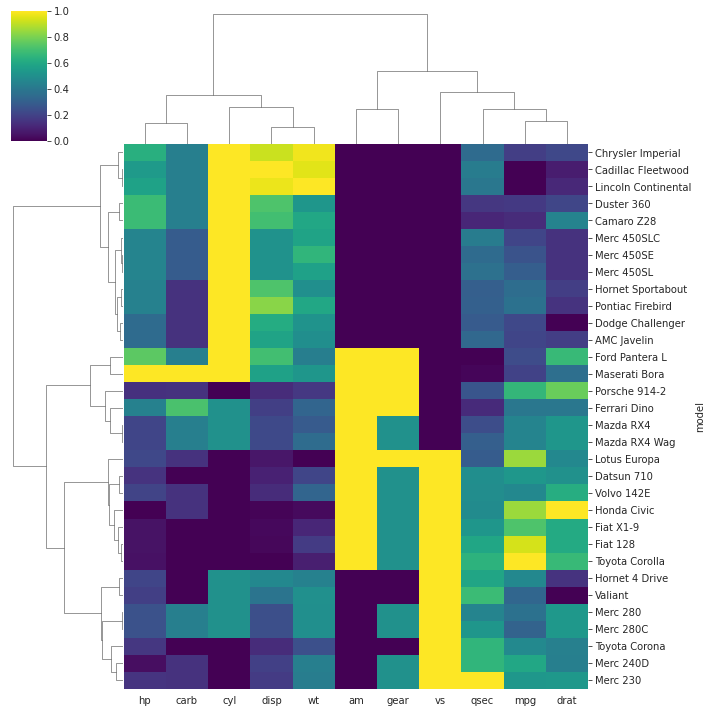

In [13]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
 

sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")
plt.show()

## Wordcloud

It might be complex to install it on windows. :-/

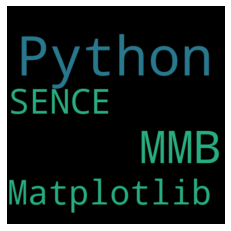

In [14]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib MMB MMB SENCE")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('foo.png')
plt.show()


## Ridge line

In [15]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

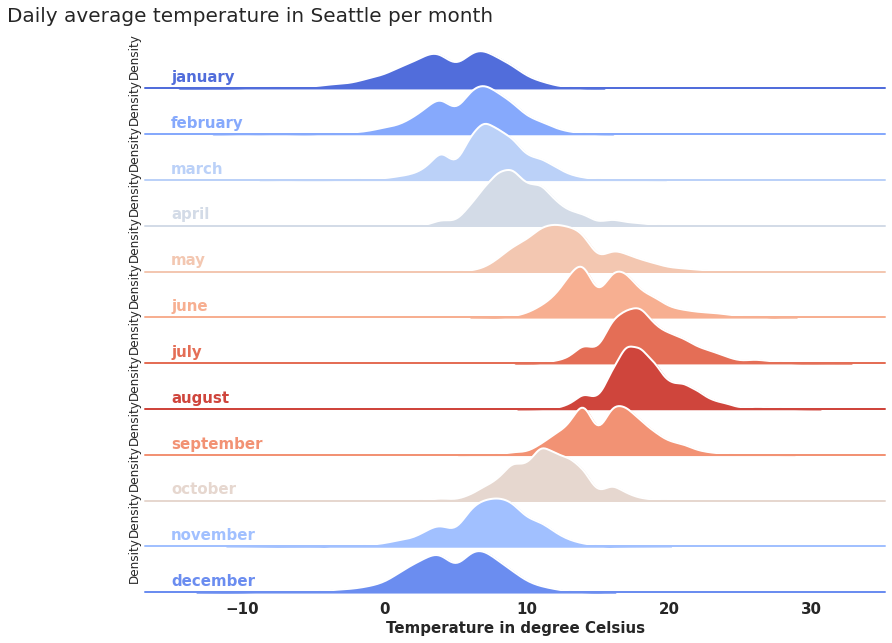

In [16]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

## Larger plots

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
plt.rcParams["figure.figsize"] = (20, 10)

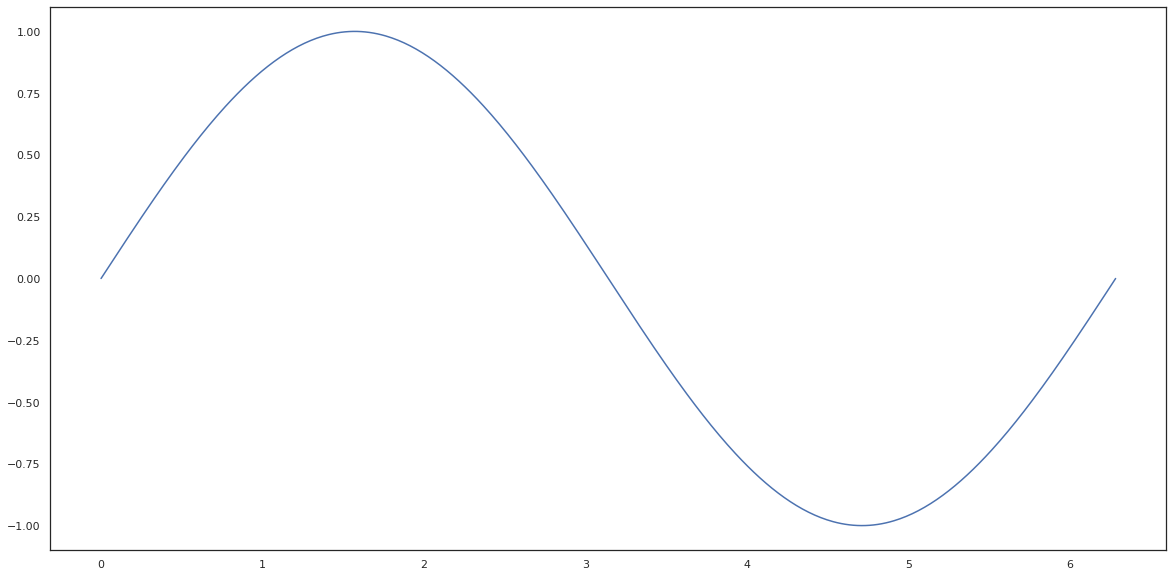

In [19]:
t = np.linspace(0, 2*np.pi, 500)
plt.plot(t, np.sin(t))
plt.show()

## Some links

* Sun path diagrams : http://andrewmarsh.com/software/sunpath2d-web/
* Tutorial for graphical user-interface (GUI) in Python : https://realpython.com/python-gui-tkinter/
* Questionnaire in Python : https://pypi.org/project/questionary/
* Questionnaire with Django : https://github.com/Pierre-Sassoulas/django-survey